<a href="https://colab.research.google.com/github/Sakshi3071/LetsGrowMore-VIP-DS-Internship-Task-2/blob/main/Stock_Market_Prediction_And_Forecasting(LGM)Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

**Stock Market Prediction And Forecasting Using Stacked LSTM**

---



---



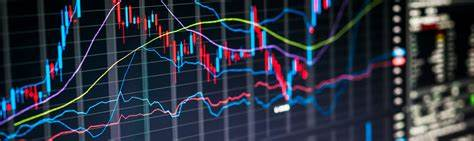

---



In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import io
import requests

In [2]:
# Fetch stock data from the URL
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
data = requests.get(url).content
stock = pd.read_csv(io.StringIO(data.decode('utf-8')))

In [3]:
stock.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
stock.shape

(2035, 8)

In [5]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [6]:
stock.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [7]:
stock.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [8]:
#Preprocess the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_stock = scaler.fit_transform(stock['Close'].values.reshape(-1,1))
scaled_stock

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [9]:
stock.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [10]:
# Split the data into train and test sets
train_size = int(len(scaled_stock) * 0.8)
train_data = scaled_stock[:train_size]
test_data = scaled_stock[train_size:]

In [11]:
#Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [12]:
seq_length = 30  # Number of previous days' prices to consider
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [13]:
# Build the model
sq = Sequential()
sq.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
sq.add(LSTM(50, return_sequences=True))
sq.add(LSTM(50))
sq.add(Dense(1))
sq.compile(optimizer='adam', loss='mse')

In [35]:
# Train the model
sq.fit(X_train, y_train, epochs=50, batch_size=200)

Epoch 1/50
8/8 [==============================] - 1s 130ms/step - loss: 2.8798e-04
Epoch 2/50
8/8 [==============================] - 1s 139ms/step - loss: 3.8093e-04
Epoch 3/50
8/8 [==============================] - 1s 133ms/step - loss: 3.3410e-04
Epoch 4/50
8/8 [==============================] - 1s 127ms/step - loss: 3.0578e-04
Epoch 5/50
8/8 [==============================] - 1s 131ms/step - loss: 3.0443e-04
Epoch 6/50
8/8 [==============================] - 1s 136ms/step - loss: 3.3752e-04
Epoch 7/50
8/8 [==============================] - 2s 249ms/step - loss: 3.1100e-04
Epoch 8/50
8/8 [==============================] - 1s 148ms/step - loss: 2.5578e-04
Epoch 9/50
8/8 [==============================] - 1s 125ms/step - loss: 2.9307e-04
Epoch 10/50
8/8 [==============================] - 1s 129ms/step - loss: 2.5628e-04
Epoch 11/50
8/8 [==============================] - 1s 125ms/step - loss: 2.7240e-04
Epoch 12/50
8/8 [==============================] - 1s 126ms/step - loss: 2.6809e-04
E

In [37]:
#Evaluate the model
train_loss = sq.evaluate(X_train, y_train)
print('Train Loss:', train_loss)
test_loss = sq.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

50/50 [==============================] - 1s 17ms/step - loss: 2.2165e-04
Train Loss: 0.0002216497523477301
12/12 [==============================] - 0s 23ms/step - loss: 1.8744e-04
Test Loss: 0.0001874408044386655


In [36]:
# Make predictions
train_pred = sq.predict(X_train)
test_pred = sq.predict(X_test)

12/12 [==============================] - 0s 20ms/step


In [38]:
## Scale the predictions back to the original range
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

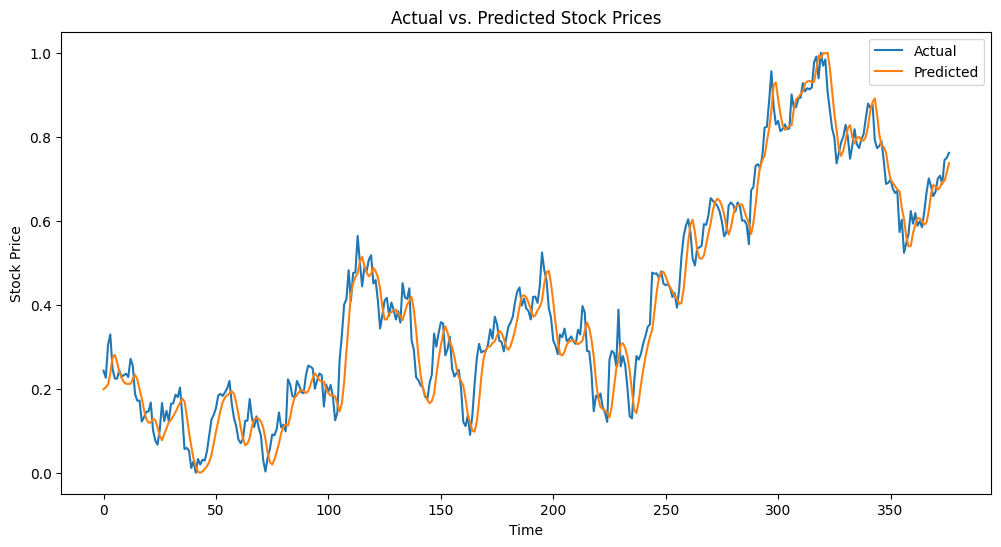

In [39]:
import matplotlib.pyplot as plt

# Plot the predicted values against the actual values
plt.figure(figsize=(12, 6))
plt.plot(scaler.fit_transform(y_test), label='Actual')
plt.plot(scaler.fit_transform(test_pred), label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()


In [44]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Calculate R-squared on the test set
r2 = r2_score(scaler.fit_transform(y_test), scaler.fit_transform(test_pred))
print('R-squared:', r2)

import numpy as np

# Calculate mean absolute percentage error (MAPE) on the test set
mape = np.mean(np.abs((scaler.fit_transform(y_test) - scaler.fit_transform(test_pred) / np.maximum(y_test, 1e-8)))) * 100
print('MAPE:', mape)



R-squared: 0.9536093307293964
MAPE: 412476.1064163956




---



---

**THE END**

---



---

